Nama : Nurul Fajriyah Al Maulidiyah

Kode : PYTN-KS14-001

# Bank Marketing Dataset
Dataset yang digunakan adalah [bank-additional.csv](https://raw.githubusercontent.com/ria-fajriyah/BankMarketing_Dataset/main/bank-additional-full.csv) yang berisi tentang direct marketing campaign dari lembaga perbankan Portugis. Tujuan klasifikasi yang dilakukan adalah untuk memprediksi apakah klien akan berlangganan deposito berjangka dengan pilihan ('yes') atau ('no') pada variabel y

# Import Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

# import library untuk preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Import Library untuk balancing
from sklearn.utils import resample

# import library untuk modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

# menonaktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

# Membaca dataset 

Menampilkan dataset dengan menggunakan fungsi `sep` (separator atau pemisah) untuk memisahkan objek yang dipisah dengan tanda `;`

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/ria-fajriyah/BankMarketing_Dataset/main/bank-additional-full.csv', sep=';')
df_bank = pd.DataFrame(dataset)
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Menampilkan jumlah baris dan kolom dari DataFrame

In [3]:
df_bank.shape

(41188, 21)

Menampilkan informasi detail tentang DataFrame seperti jumlah baris data, nama-nama kolom beserta jumlah data dan tipe datanya, dan sebagainya

In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Menampilkan statistik deskriptif data dalam DataFrame

In [5]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Keterangan**

- `age` : umur klien (numeric)
- `job` : tipe pekerjaan klien (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur","student", "blue-collar", "self-employed", "retired", "technician", "services") 
- `marital` : status pernikahan klien (categorical: "unknown", "married", "divorced", "single"; catatan : "divorced" berarti bercerai atau janda)
- `education` : tingkat pendidikan klien (categorical: "unknown", "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "profesional.course", "university.degree")
- `default` : apakah pelanggan memiliki kredit dalam default? (binary: "yes", "no")
- `balance` : saldo tahunan rata-rata, dalam euro (numeric) 
- `housing` : apakah pelanggan memiliki pinjaman perumahan? (binary: "yes","no")
- `loan` : apakah pelanggan memiliki pinjaman pribadi (binary: "yes","no")

**terkait dengan kontak terakhir dari kampanye saat ini:**
- `contact` : jenis komunikasi (categorical: "unknown", "telephone", "cellular") 
- `day` : hari kontak terakhir pada bulan tersebut (numeric)
- `month` : bulan kontak terakhir pada tahun tersebut (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- `duration` : durasi kontak terakhir, dalam detik (numeric)

**atribut lain:**
- `campaign` : jumlah kontak yang dilakukan dengan klien selama kampanye (numeric, termasuk kontak terakhir)
- `pdays` : jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numeric, -1 berarti klien sebelumnya tidak dihubungi)
- `previous` : jumlah kontak yang dilakukan dengan klien sebelum kampanye ini (numeric)
- `poutcome` : hasil dari kampanye pemasaran sebelumnya (categorical: "unknown", "other", "failure", "success")
- `emp.var.rate` : tingkat variasi pekerjaan - indikator triwulan (numeric)
- `cons.price.idx` : indeks harga konsumen - indikator bulanan (numeric)
- `cons.conf.idx` : indeks kepercayaan konsumen - indikator bulanan (numeric)
- `euribor3m` : tarif 3 bulan euribor - indikator harian (numeric)
- `nr.employed` : jumlah karyawan - indikator triwulanan (numeric)

**Output variable (target yang diinginkan):**
- `y` : apakah klien sudah berlangganan deposito berjangka? (binary : "yes", "no")

# Data Preprocessing

## Data Cleaning

Menghapus kolom yang tidak diperlukan 

In [6]:
df_bank.drop(['pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1, inplace=True)
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,no


Mengecek apakah ada missing value

In [7]:
df_bank.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
y              0
dtype: int64

Mengecek apakah ada duplikat dalam data dan jumlah value dalam DataFrame

In [8]:
df_bank.duplicated().value_counts()

False    41172
True        16
dtype: int64

Menghapus data duplikat

In [9]:
df_bank.drop_duplicates(inplace=True)

Mengecek kembali apakah masih ada data duplikat

In [10]:
df_bank.duplicated().value_counts()

False    41172
dtype: int64

## Label Encoder
Menggunakan Label Encoder untuk mengkonversi data yang bertipe object menjadi numerik (int32) agar memudahkan untuk dilakukan training dan testing

In [11]:
# menginisiasi objek LabelEncoder
le = LabelEncoder()

# memilih variabel yang akan di convert
df_category = df_bank.select_dtypes(include='object')
le_bank = df_bank.copy()

# mengkonversi variabel kategorikal menggunakan LabelEncoder
for var in df_category:
    le_bank[var] = le.fit_transform(le_bank[var])

# menampilkan hasil data yang telah di convert
le_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
0,56,3,1,0,0,0,0,1,6,1,261,1,0
1,57,7,1,3,1,0,0,1,6,1,149,1,0
2,37,7,1,3,0,2,0,1,6,1,226,1,0
3,40,0,1,1,0,0,0,1,6,1,151,1,0
4,56,7,1,3,0,0,2,1,6,1,307,1,0


In [12]:
le_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41172 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          41172 non-null  int64
 1   job          41172 non-null  int32
 2   marital      41172 non-null  int32
 3   education    41172 non-null  int32
 4   default      41172 non-null  int32
 5   housing      41172 non-null  int32
 6   loan         41172 non-null  int32
 7   contact      41172 non-null  int32
 8   month        41172 non-null  int32
 9   day_of_week  41172 non-null  int32
 10  duration     41172 non-null  int64
 11  campaign     41172 non-null  int64
 12  y            41172 non-null  int32
dtypes: int32(10), int64(3)
memory usage: 2.8 MB


## Undersampling
Dikarenakan jumlah data yang tidak seimbang antara Yes dan No, maka diterapkan proses Undersampling

In [13]:
df_bank['y'].value_counts()

no     36533
yes     4639
Name: y, dtype: int64

In [14]:
# membuat 2 dataframe dari majority dan minority class 
df_majority = le_bank[(le_bank['y']==0)] 
df_minority = le_bank[(le_bank['y']==1)] 

# upsample minority class
df_majority_undersampling = resample(df_majority, replace = True, n_samples = 4639, random_state = 42)

# Combine majority class with upsampled minority class
df_undersampling = pd.concat([df_majority_undersampling, df_minority]) 

In [15]:
df_undersampling.reset_index(inplace=True, drop=True)
df_undersampling.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,y
0,25,1,2,1,0,0,0,0,3,4,123,2,0
1,48,7,1,3,1,2,0,1,6,4,243,1,0
2,26,1,2,2,1,0,2,1,4,0,175,14,0
3,42,1,0,0,0,2,2,1,6,4,738,1,0
4,51,2,0,6,0,1,1,0,3,1,19,14,0


In [16]:
df_undersampling['y'].value_counts()

0    4639
1    4639
Name: y, dtype: int64

In [17]:
df_undersampling.shape

(9278, 13)

Setelah dilakukan proses undersampling dengan menyesuakian nilai minoritas, data menjadi seimbang dengan jumlah RainTomorrow antara No (0) dan Yes (1) yaitu sebanyak 4.639. Dataset yang digunakan untuk proses selanjutnya berjumlah 9.278 dari yang sebelum dilakukan proses undersampling yaitu sebanyak 41.188.

## Standard Scaler
Membagi dataset menjadi data latih (train) dan data uji (test) serta membuang kolom `y` pada x_train dan x_test, lalu memasukkan kolom `y` pada y_train dan y_test 

In [18]:
train, test = train_test_split(df_undersampling, test_size = 0.2, random_state = 42)
    
# memisahkan variabel dependen dan independen pada data training dan testing
x_train = train.drop(labels='y',axis=1)
y_train = train['y']
x_test  = test.drop(labels='y',axis=1)
y_test  = test['y']

Menggunakan standard scaler yang merupakan class dari sklearn untuk melakukan normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang besar

In [19]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Visualisasi Data

## Bar Plot untuk yang bertipe data object

Membuat variabel kategori untuk menampung data dengan tipe data object 

In [20]:
kategori = df_bank.select_dtypes(include=['object']).columns.values

for col in kategori:
    print(col, "(", len(df_bank[col].unique()),"values):\n", np.sort(df_bank[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 4 values):
 ['divorced' 'married' 'single' 'unknown']
education ( 8 values):
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ( 3 values):
 ['no' 'unknown' 'yes']
housing ( 3 values):
 ['no' 'unknown' 'yes']
loan ( 3 values):
 ['no' 'unknown' 'yes']
contact ( 2 values):
 ['cellular' 'telephone']
month ( 10 values):
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ( 5 values):
 ['fri' 'mon' 'thu' 'tue' 'wed']
y ( 2 values):
 ['no' 'yes']


Membuat bar plot untuk variabel kategori

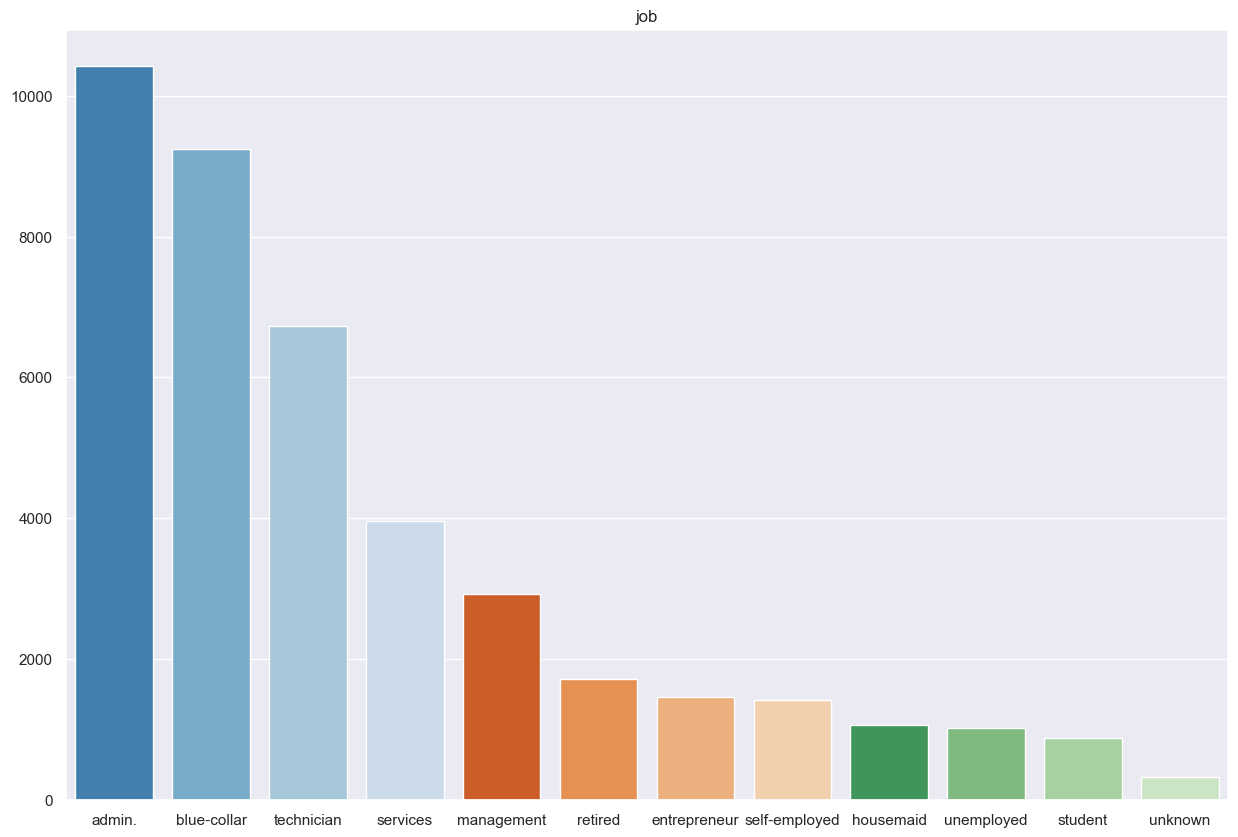

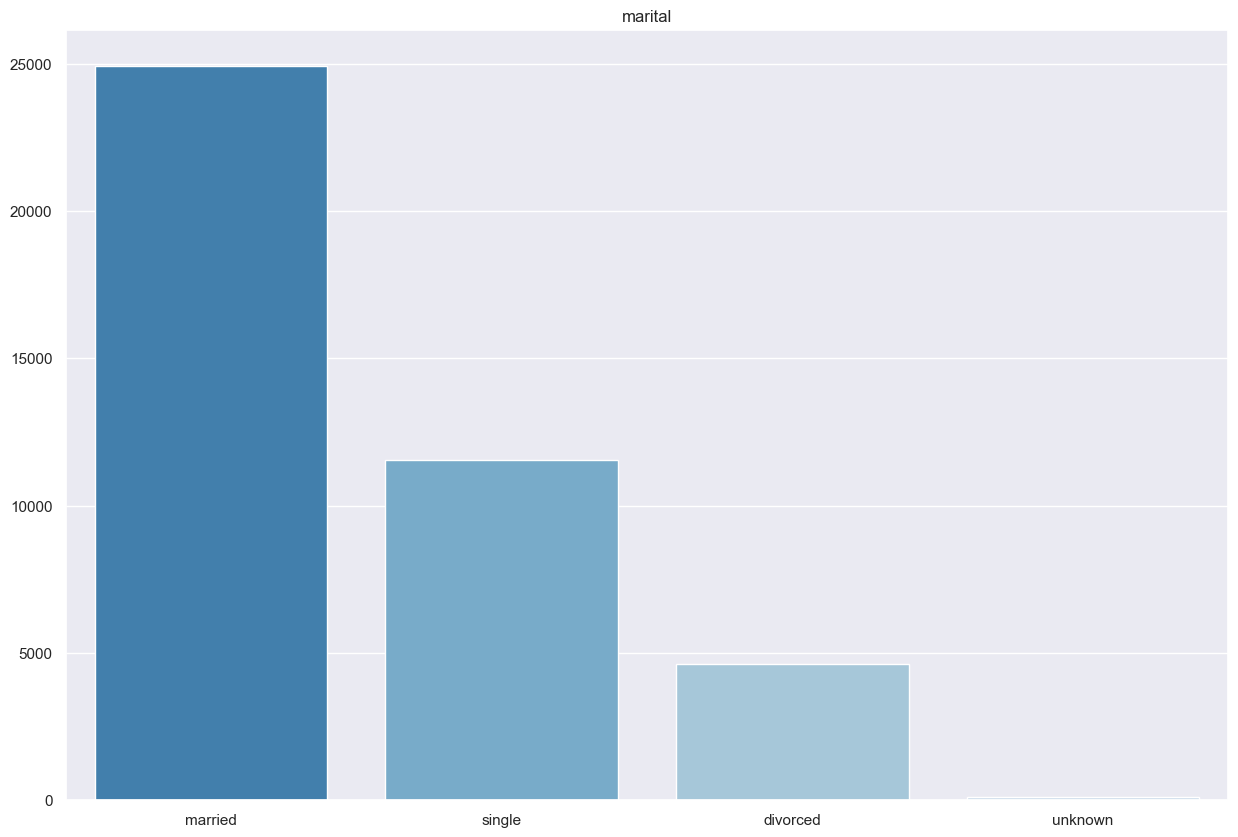

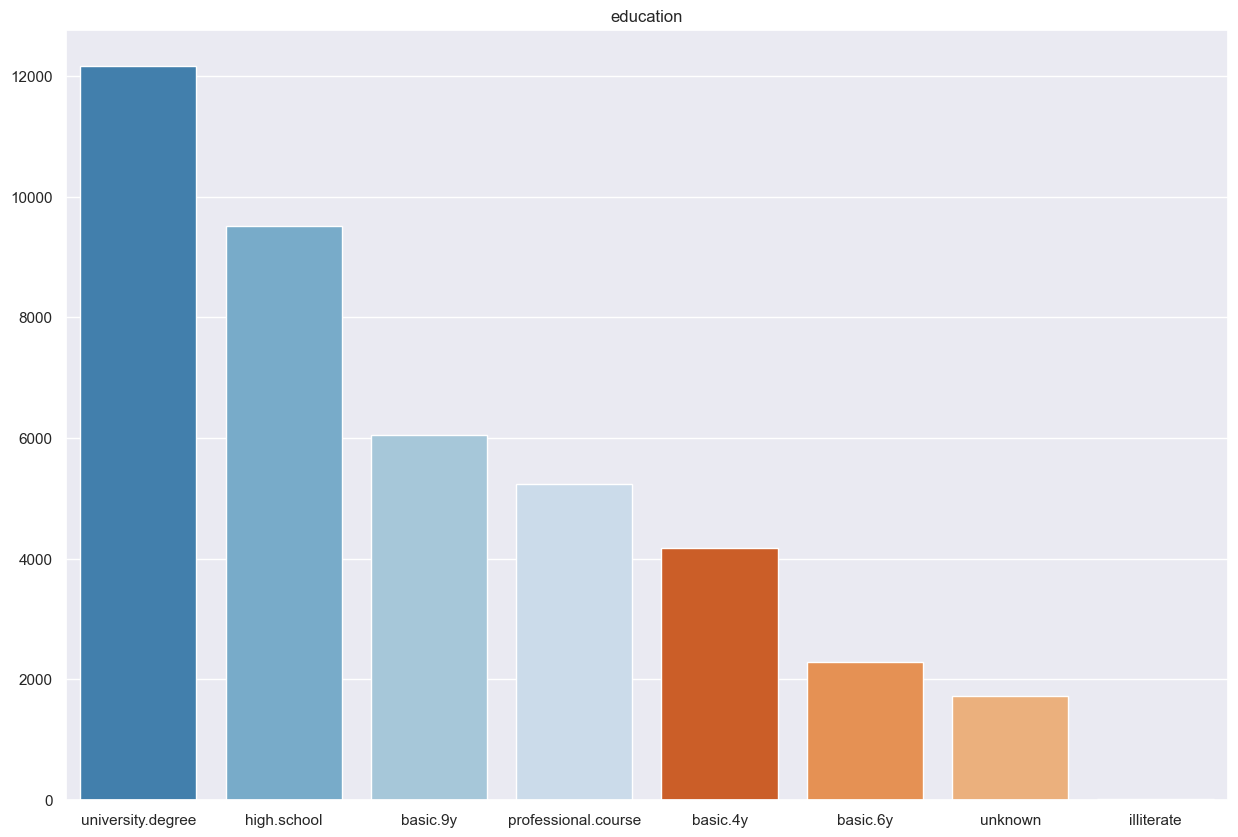

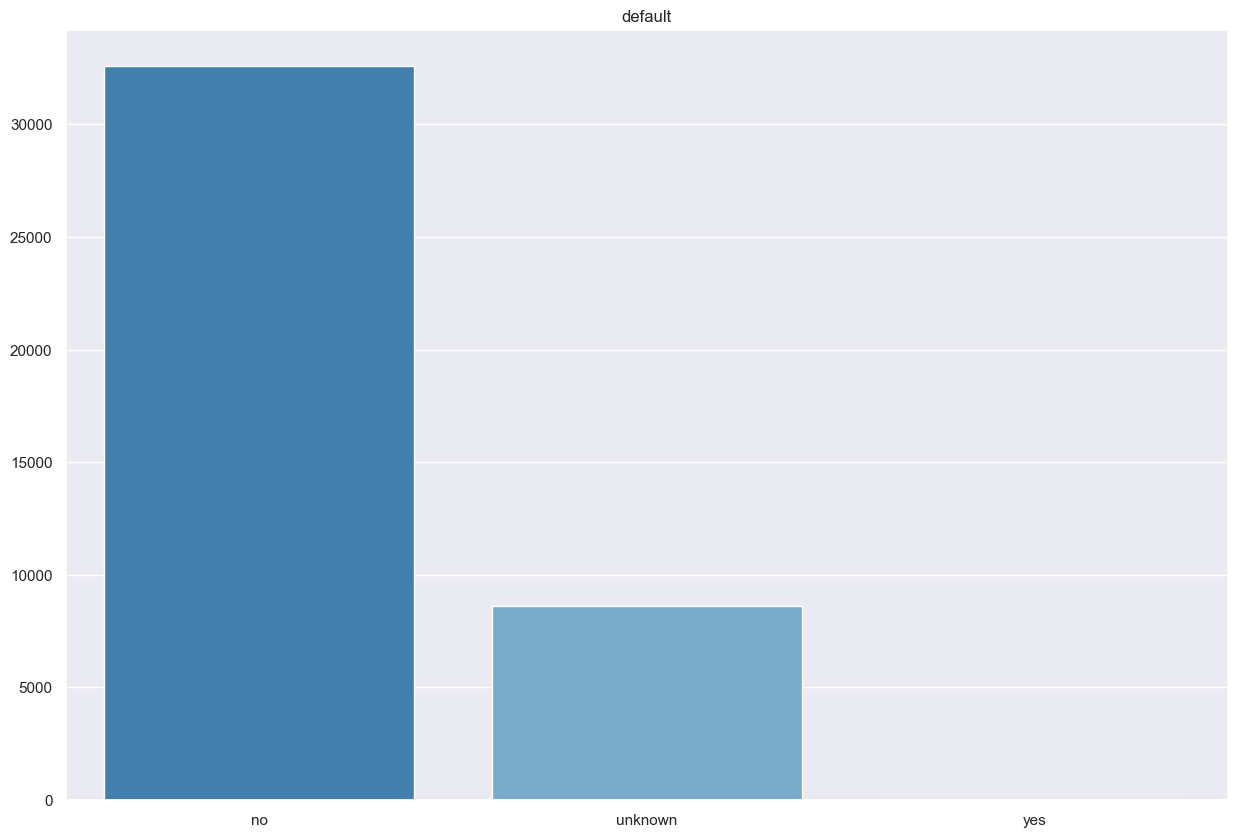

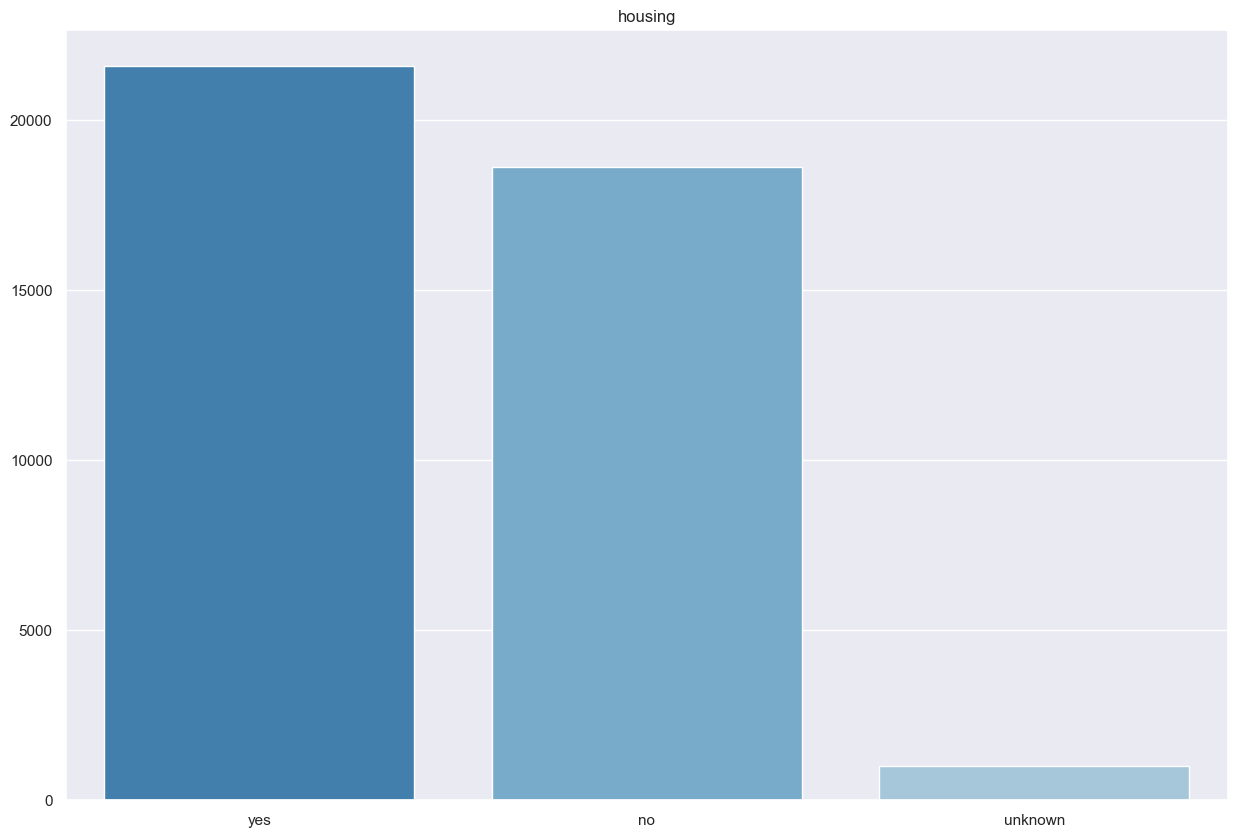

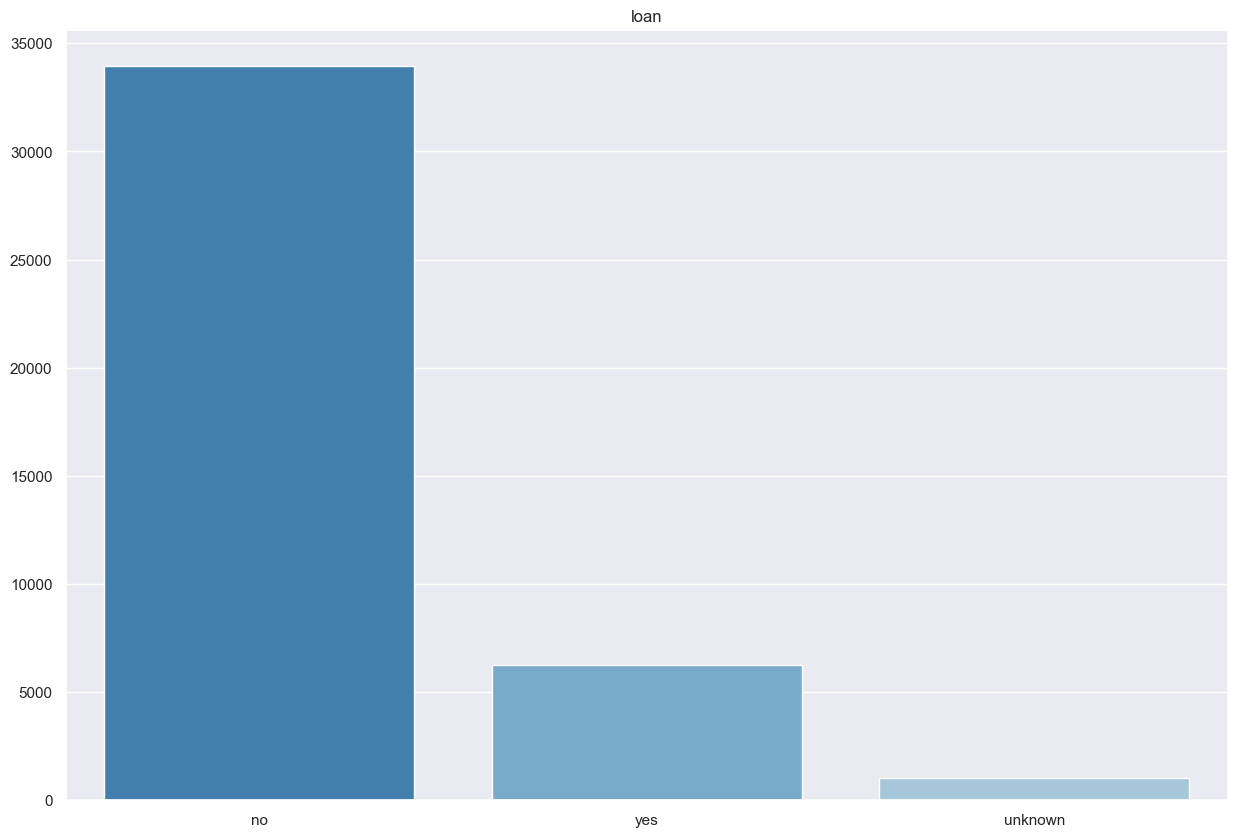

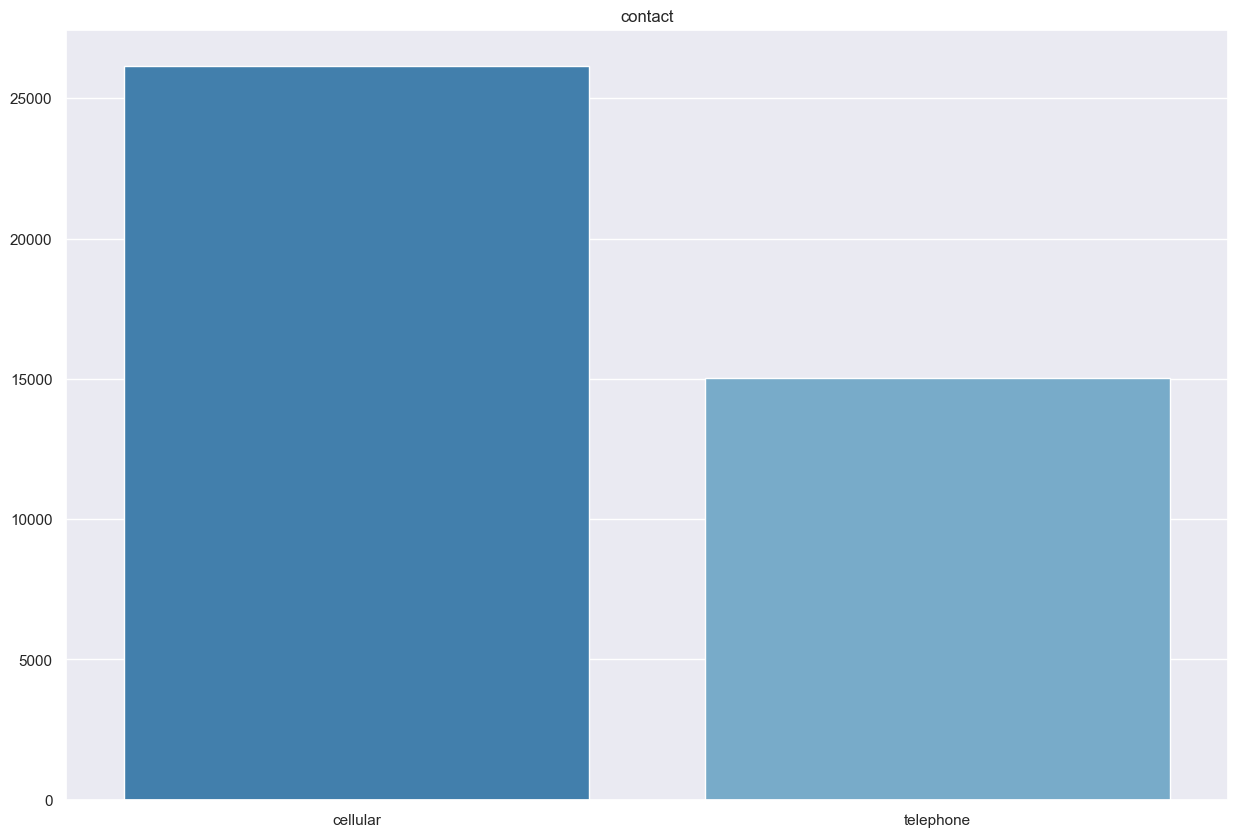

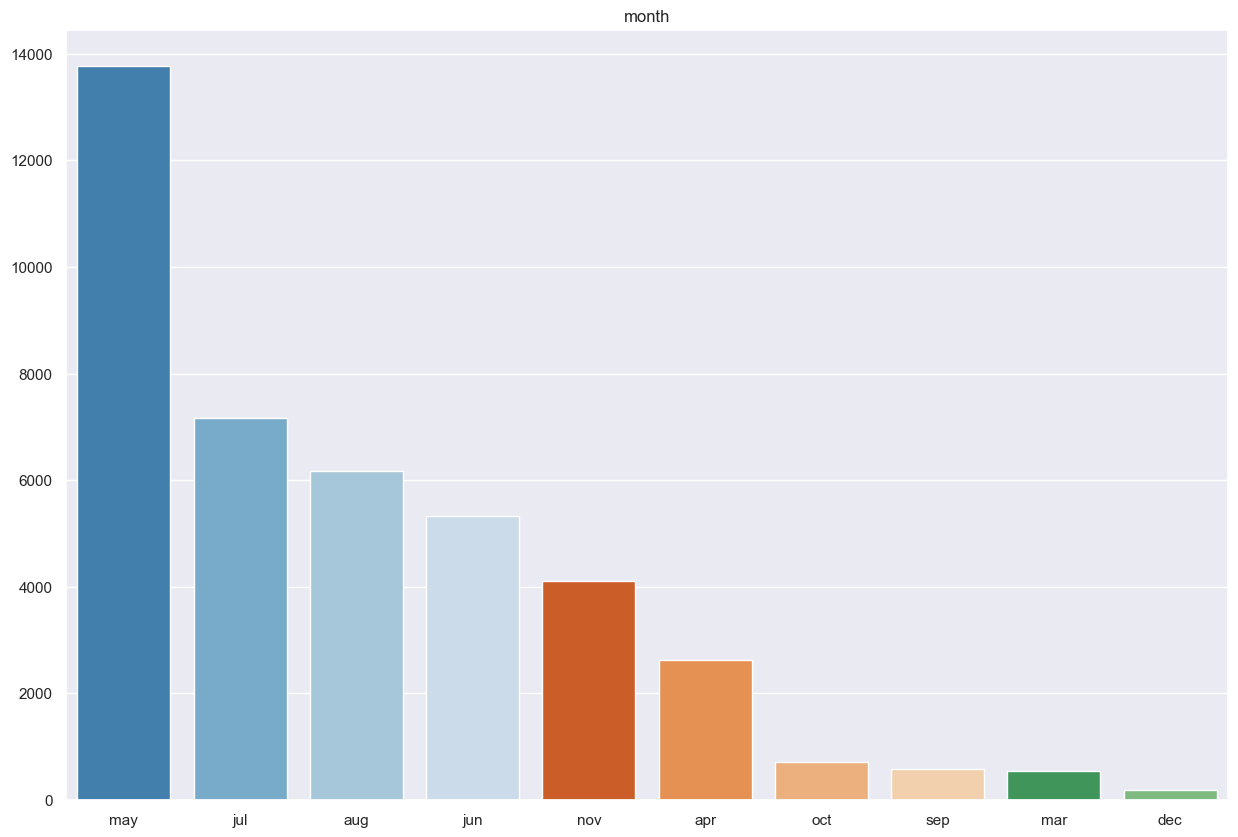

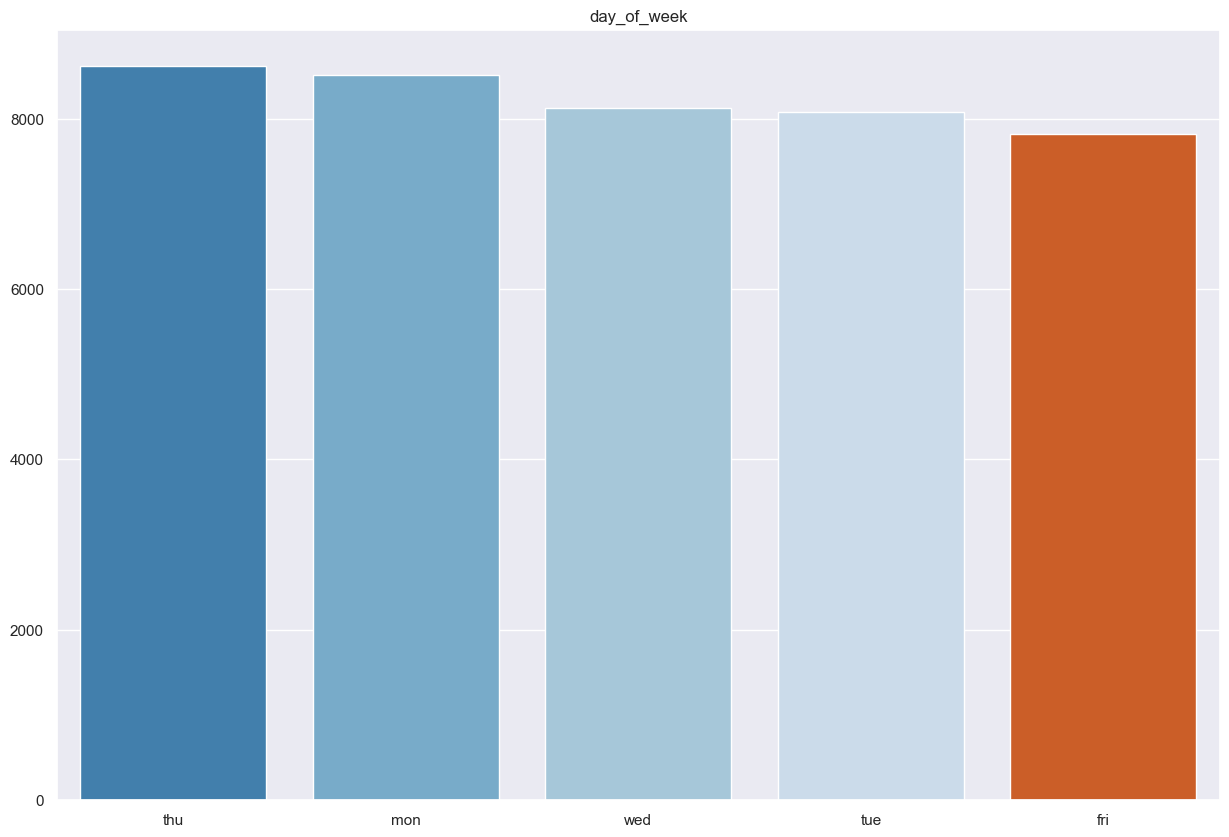

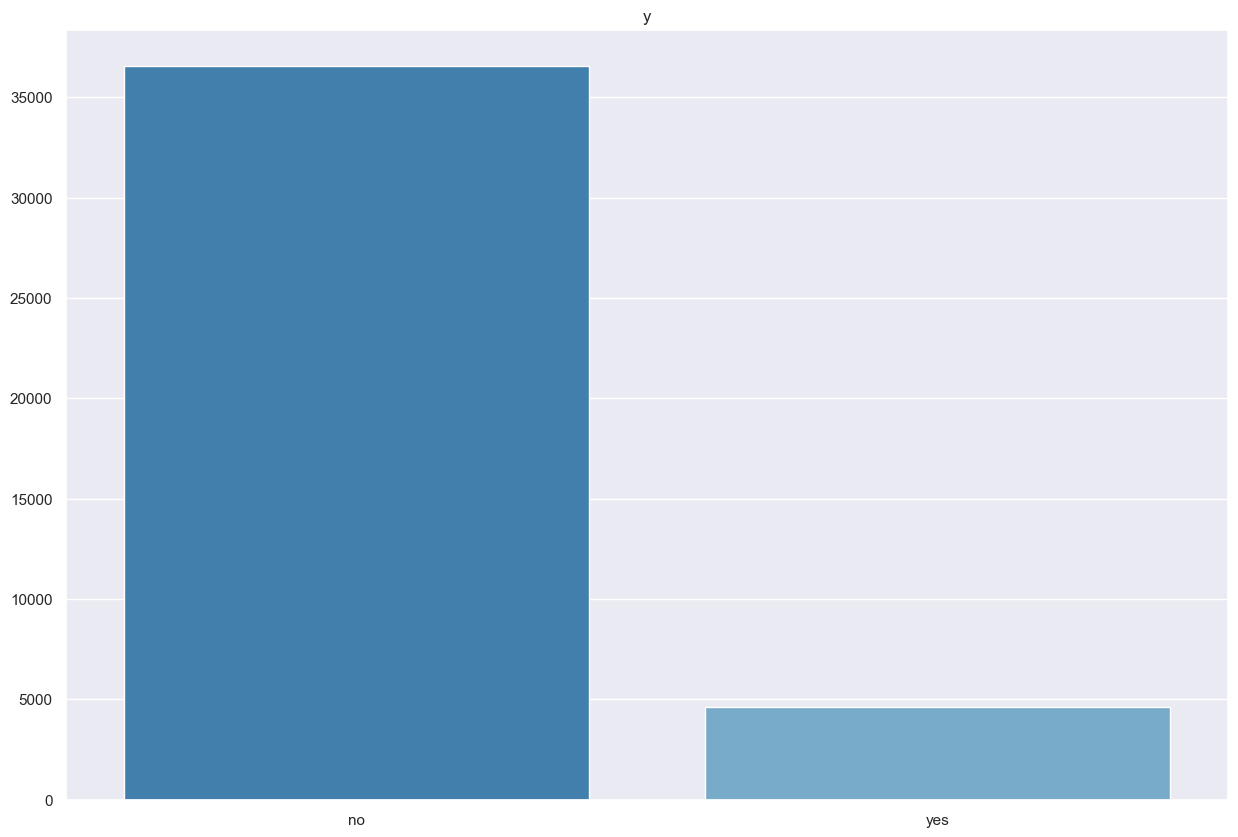

In [21]:
for col in kategori:
    x = df_bank[col].value_counts().index
    y = df_bank[col].value_counts().values
    plt.figure(figsize=(15,10)) 
    sns.set(style='darkgrid', palette='tab20c')
    sns.barplot(x, y)    
    plt.title(col)
    plt.show()

## Histogram dari seluruh kolom

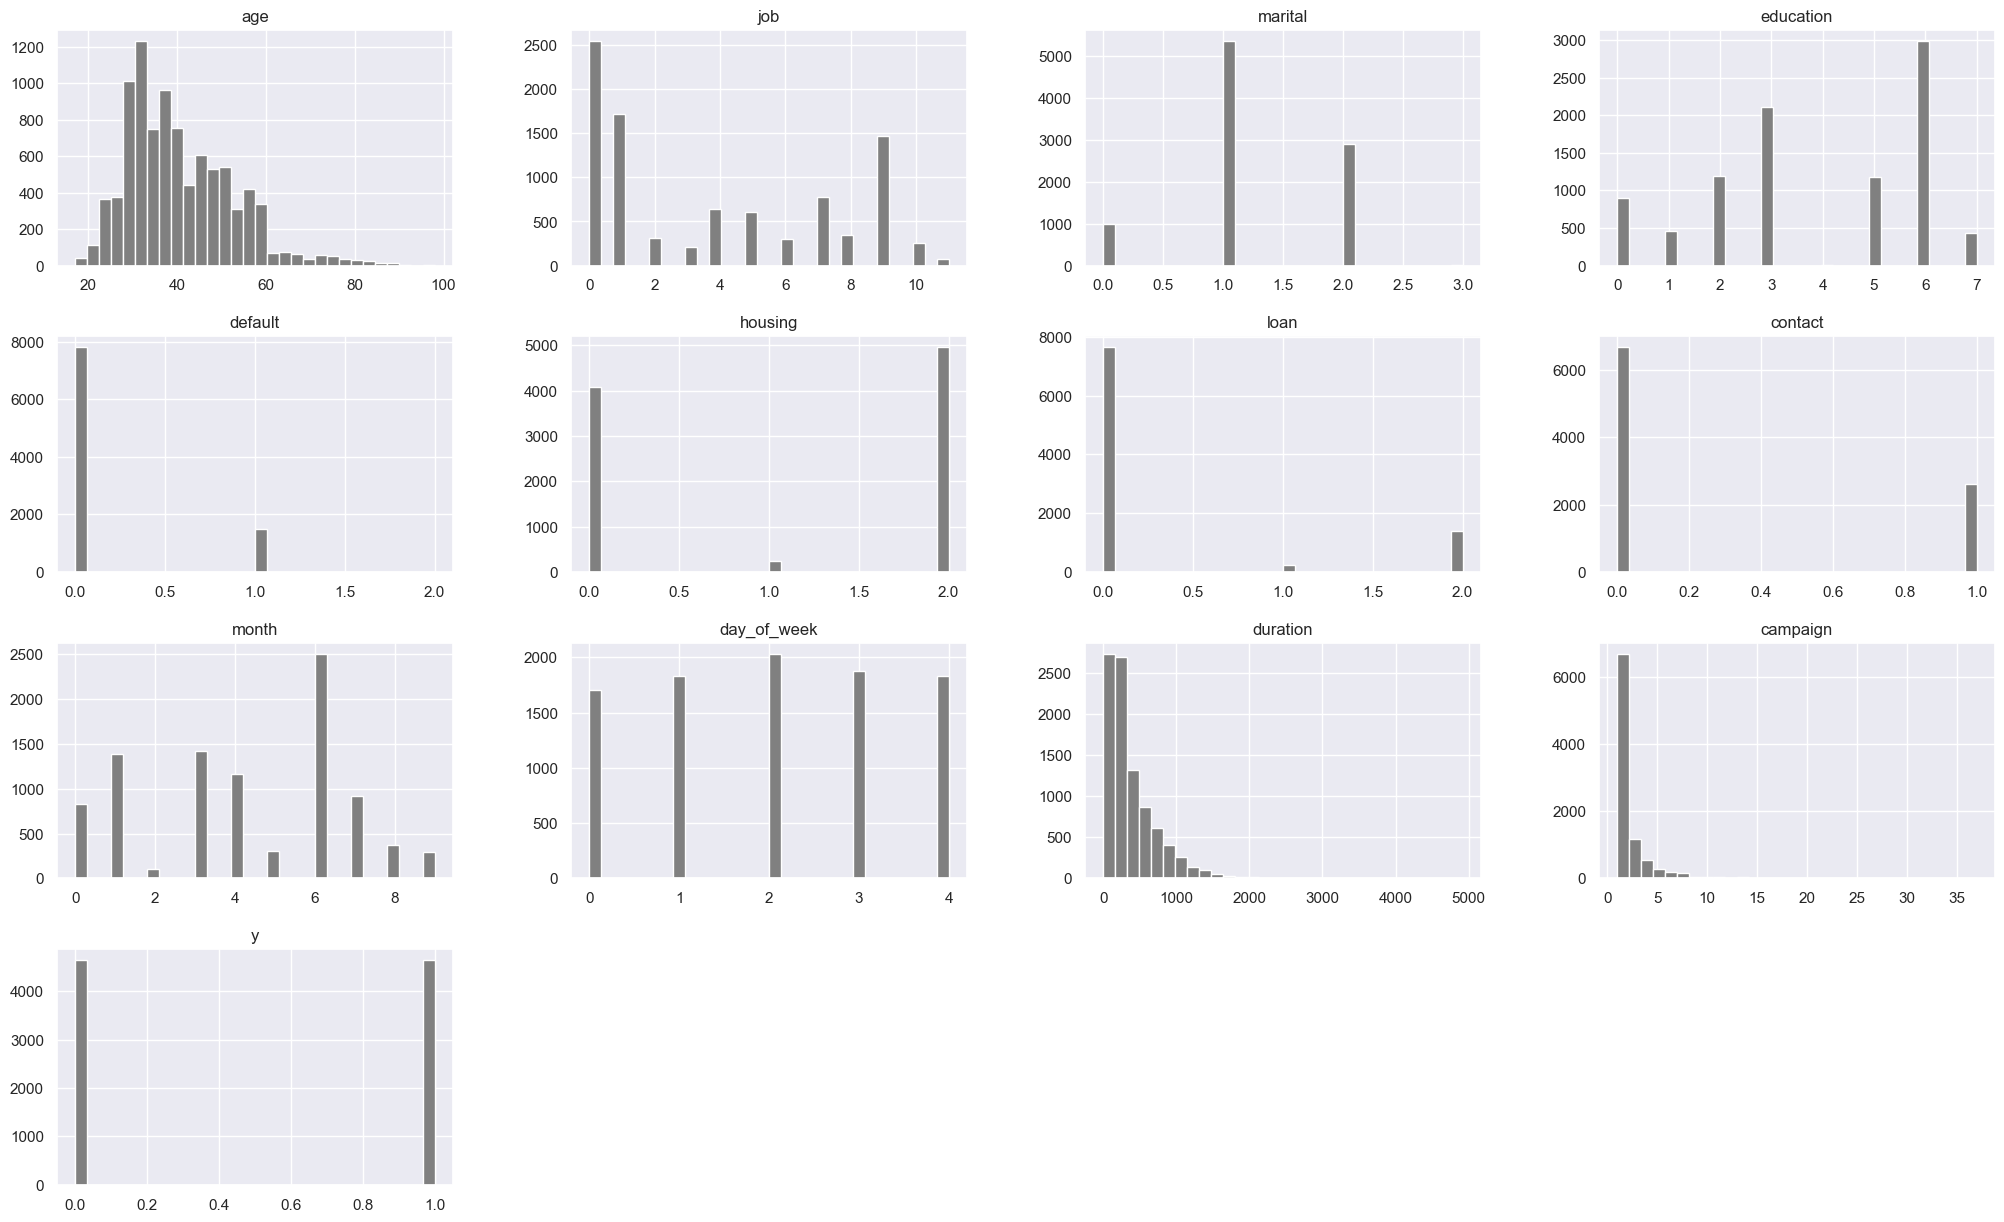

In [22]:
df_undersampling.hist(bins=30, figsize=(25,15), color='grey')
plt.show()

## Heatmap untuk melihat korelasi antar atribut data

<AxesSubplot:>

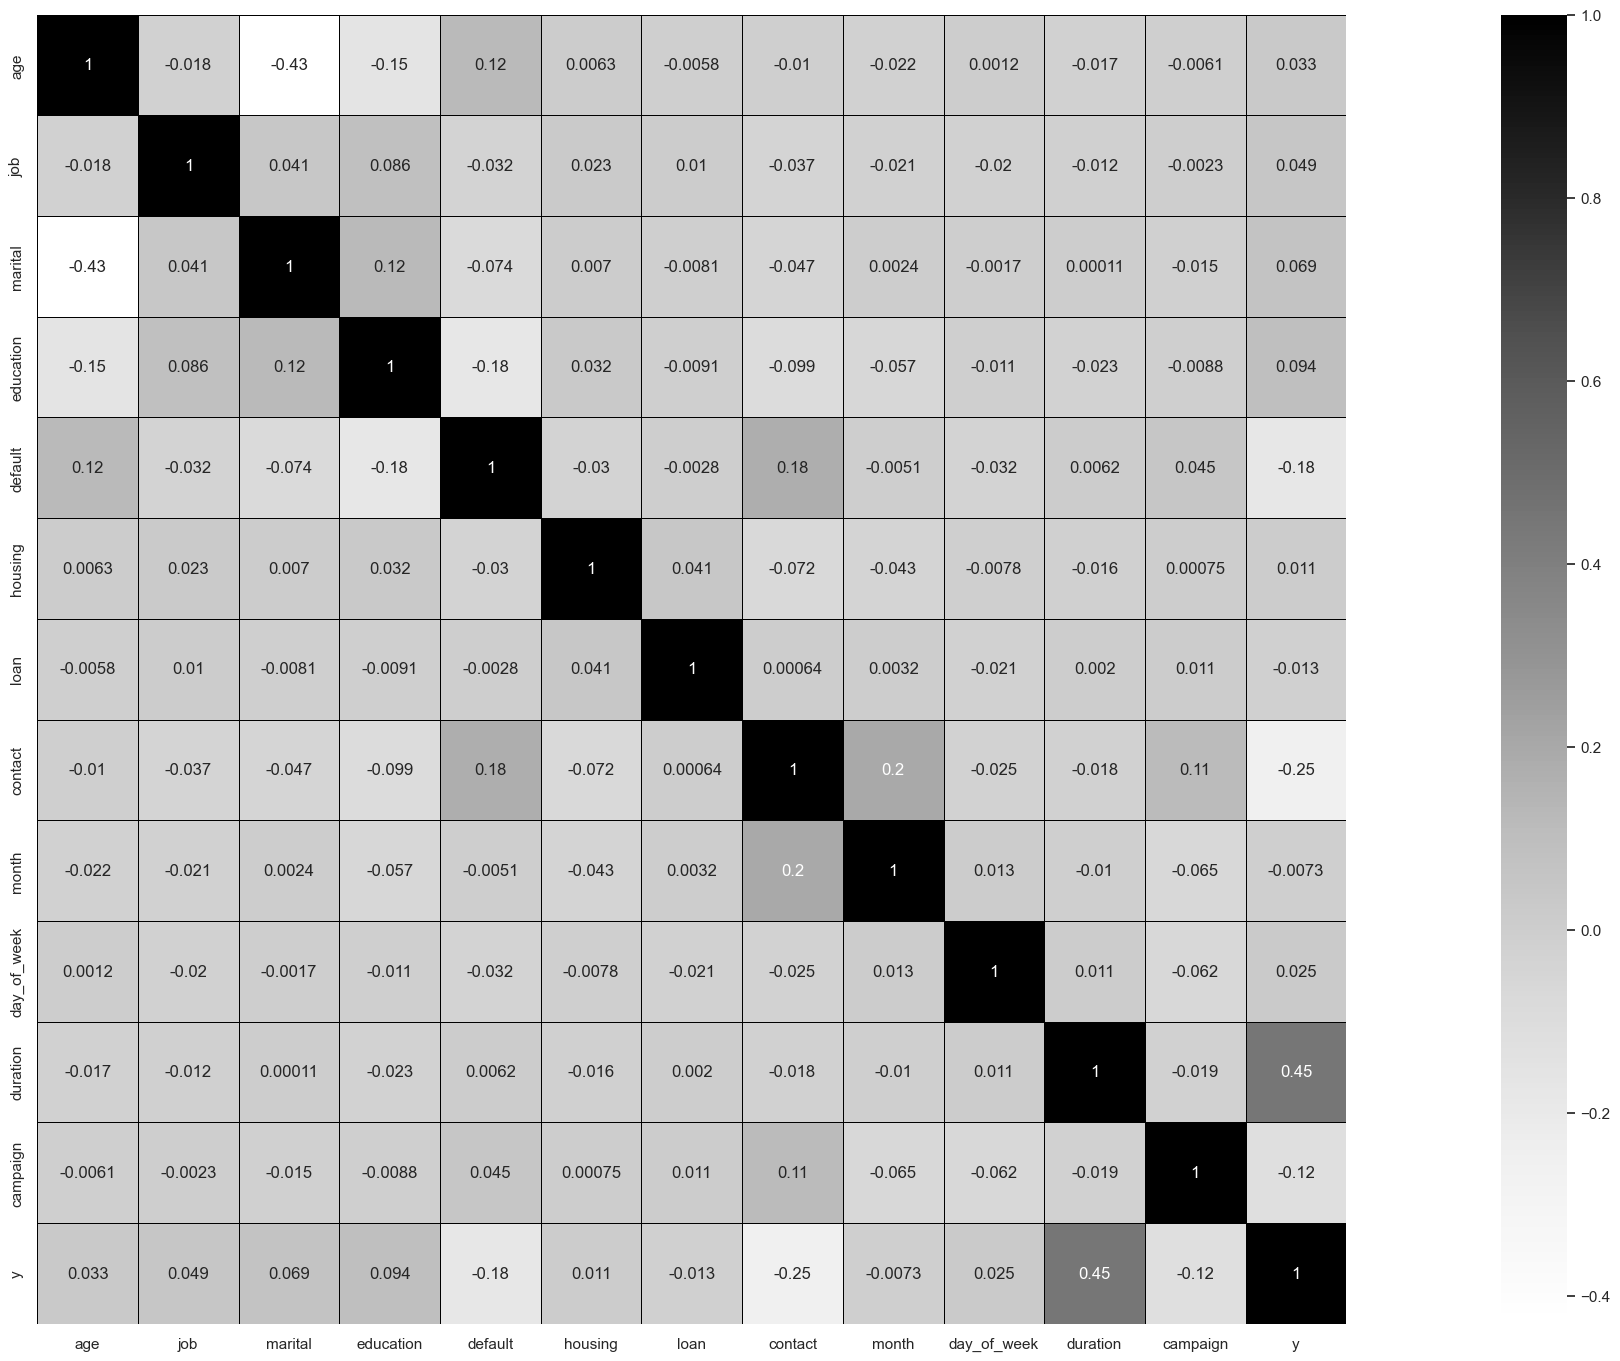

In [23]:
plt.figure(figsize=(40, 17))
sns.heatmap(df_undersampling.corr(),annot=True, cmap='Greys', linewidths=.5, linecolor='black', square=True)

# Data Modelling
Membuat array accuracy_list untuk menyimpan daftar akurasi pada setiap model dan array accuracy_gscv untuk menyimpan list akurasi setelah dilakukan hyperparameter tuning menggunakan GridSearchCV

In [24]:
accuracy_list= []

In [25]:
accuracy_gscv = []

## Logistic Regression

In [26]:
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

y_pred1 = lr.predict(x_test_scaled)

akurasi1 = accuracy_score(y_test, y_pred1)
accuracy_list.append(100*akurasi1)

print("Akurasi Model :", akurasi1)

Akurasi Model : 0.7839439655172413


### Classification Report

In [27]:
report = classification_report(y_test, y_pred1)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       925
           1       0.79      0.77      0.78       931

    accuracy                           0.78      1856
   macro avg       0.78      0.78      0.78      1856
weighted avg       0.78      0.78      0.78      1856



### Confusion Matrix

In [28]:
cm = confusion_matrix(y_test, y_pred1)

print("Confusion Matrix :", "\n", cm)

Confusion Matrix : 
 [[739 186]
 [215 716]]


Visualisasi confusion matrix menggunakan heatmap

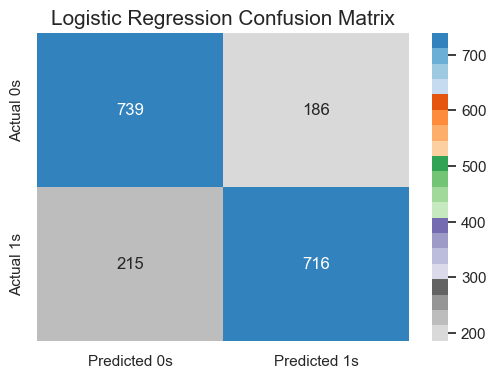

In [29]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("Logistic Regression Confusion Matrix", fontsize=15)
sns.heatmap(cm, annot=True, cmap='tab20c_r', fmt='g',
            xticklabels = ('Predicted 0s','Predicted 1s'), 
            yticklabels = ('Actual 0s','Actual 1s'));

### Model Improvement using GridSearchCV

In [30]:
# Define hyperparameters to be tuned
param_grid = {
    'penalty':['l1','l2'],
    'C' : [0.1, 1, 10]
}


# Grid search to find best hyperparameters
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Print best parameters and accuracy
print("Best Parameters :", grid_search.best_params_)
print("Best Accuracy   :", grid_search.best_score_)

Best Parameters : {'C': 10, 'penalty': 'l2'}
Best Accuracy   : 0.7780896112971585


In [31]:
# Make predictions on test set using best estimator
best_estimator = grid_search.best_estimator_
y_pred1a = best_estimator.predict(x_test_scaled)

akurasi1a = accuracy_score(y_test, y_pred1a)
accuracy_gscv.append(100*akurasi1a)
print(f"Akurasi Model: {akurasi1a}", "\n")

report = classification_report(y_test, y_pred1a)
print(report)

Akurasi Model: 0.7839439655172413 

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       925
           1       0.79      0.77      0.78       931

    accuracy                           0.78      1856
   macro avg       0.78      0.78      0.78      1856
weighted avg       0.78      0.78      0.78      1856



**Kesimpulan** 

Berdasarkan hasil perhitungan akurasi diatas, maka dapat disimpulkan bahwa pada model logistic regression, hyperparameter tuning menggunakan GridSearchCV tidak berpengaruh untuk menaikkan akurasi sehingga nilai akurasi tidak berubah yaitu 78.39%.

## K-Nearest Neighbors

In [32]:
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

y_pred2 = knn.predict(x_test_scaled)

akurasi2 = accuracy_score(y_test, y_pred2)
accuracy_list.append(100*akurasi2)

print("Akurasi Model :", akurasi2)

Akurasi Model : 0.7483836206896551


### Classification Report

In [33]:
report = classification_report(y_test, y_pred2)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       925
           1       0.77      0.72      0.74       931

    accuracy                           0.75      1856
   macro avg       0.75      0.75      0.75      1856
weighted avg       0.75      0.75      0.75      1856



### Confusion Matrix

In [34]:
cm2 = confusion_matrix(y_test, y_pred2)

print("Confusion Matrix :", "\n", cm2)

Confusion Matrix : 
 [[722 203]
 [264 667]]


Visualisasi confusion matrix menggunakan heatmap

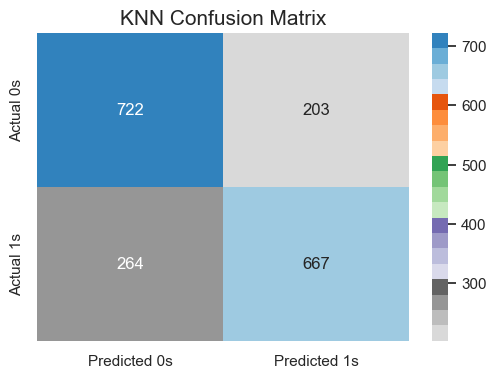

In [35]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("KNN Confusion Matrix", fontsize=15)
sns.heatmap(cm2, annot=True, cmap='tab20c_r', fmt='g',
            xticklabels = ('Predicted 0s','Predicted 1s'), 
            yticklabels = ('Actual 0s','Actual 1s'));

### Model Improvement using GridSearchCV

In [36]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(x_train_scaled, y_train)

print(f"Best Parameters : {grid_search.best_params_}")
print(f"Best Score      : {grid_search.best_score_}")

Best Parameters : {'n_neighbors': 11}
Best Score      : 0.7409059144908202


In [37]:
k = 11
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_scaled, y_train)

y_pred2a = knn.predict(x_test_scaled)

akurasi2a = accuracy_score(y_test, y_pred2a)
accuracy_gscv.append(100*akurasi2a)
print(f"Akurasi Model: {akurasi2a}", "\n")

report = classification_report(y_test, y_pred2a)
print(report)

Akurasi Model: 0.7586206896551724 

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       925
           1       0.77      0.74      0.75       931

    accuracy                           0.76      1856
   macro avg       0.76      0.76      0.76      1856
weighted avg       0.76      0.76      0.76      1856



**Kesimpulan**

Berdasarkan hasil perhitungan akurasi diatas, maka dapat disimpulkan bahwa pada model KNN, hyperparameter tuning menggunakan GridSearchCV berpengaruh untuk menaikkan akurasi sehingga nilai akurasi bertambah dari 74.84% ke 75.86%.

## Support Vector Machine

In [38]:
svm = SVC()
svm.fit(x_train_scaled, y_train)

y_pred3 = svm.predict(x_test_scaled)

akurasi3 = accuracy_score(y_test, y_pred3)
accuracy_list.append(100*akurasi3)

print("Akurasi Model :", akurasi3)

Akurasi Model : 0.8098060344827587


### Classification Report

In [39]:
report = classification_report(y_test, y_pred3)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       925
           1       0.80      0.83      0.81       931

    accuracy                           0.81      1856
   macro avg       0.81      0.81      0.81      1856
weighted avg       0.81      0.81      0.81      1856



### Confusion Matrix

In [40]:
cm3 = confusion_matrix(y_test, y_pred3)

print("Confusion Matrix :", "\n", cm3)

Confusion Matrix : 
 [[728 197]
 [156 775]]


Visualisasi confusion matrix menggunakan heatmap

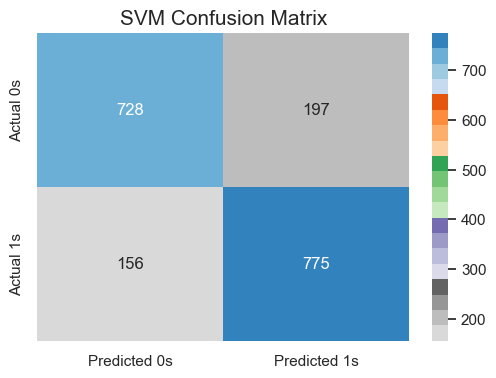

In [41]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("SVM Confusion Matrix", fontsize=15)
sns.heatmap(cm3, annot=True, cmap='tab20c_r', fmt='g',
            xticklabels = ('Predicted 0s','Predicted 1s'), 
            yticklabels = ('Actual 0s','Actual 1s'));

### Model Improvement using GridSearchCV

In [42]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear','radial']}  
   
grid_search = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, n_jobs=-1) 
   
# fitting the model for grid search 
grid_search.fit(x_train_scaled, y_train)
 
# print best parameter after tuning 

print(f"Best Parameters : {grid_search.best_params_}")
print(f"Best Score      : {grid_search.best_score_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters : {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score      : 0.7755295089257354


In [43]:
y_pred3a = grid_search.predict(x_test_scaled)

akurasi3a = accuracy_score(y_test, y_pred3a)
accuracy_gscv.append(100*akurasi3a)
print(f"Akurasi Model: {akurasi3a}", "\n")

report = classification_report(y_test, y_pred3a)
print(report)

Akurasi Model: 0.7882543103448276 

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       925
           1       0.80      0.77      0.78       931

    accuracy                           0.79      1856
   macro avg       0.79      0.79      0.79      1856
weighted avg       0.79      0.79      0.79      1856



**Kesimpulan**

Berdasarkan hasil perhitungan akurasi diatas, maka dapat disimpulkan bahwa pada model SVM, hyperparameter tuning menggunakan GridSearchCV justru berpengaruh pada penurunan akurasi sehingga nilai akurasi menurun dari 80.98% ke 78.83%.

## Decision Tree

In [44]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train_scaled, y_train)

y_pred4 = dtc.predict(x_test_scaled)

akurasi4 = accuracy_score(y_test, y_pred4)
accuracy_list.append(100*akurasi4)

print("Akurasi Model :", akurasi4)

Akurasi Model : 0.7914870689655172


### Classification Report

In [45]:
report = classification_report(y_test, y_pred4)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       925
           1       0.81      0.76      0.79       931

    accuracy                           0.79      1856
   macro avg       0.79      0.79      0.79      1856
weighted avg       0.79      0.79      0.79      1856



### Confusion Matrix

In [46]:
cm4 = confusion_matrix(y_test, y_pred4)

print("Confusion Matrix :", "\n", cm4)

Confusion Matrix : 
 [[757 168]
 [219 712]]


Visualisasi confusion matrix menggunakan heatmap

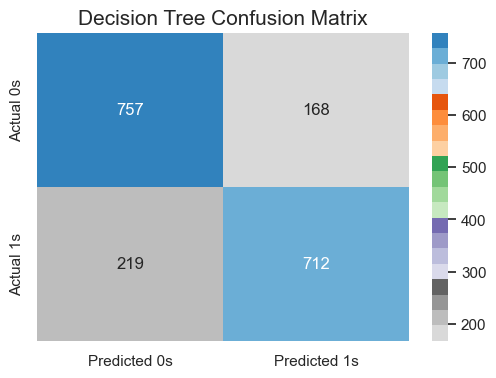

In [47]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("Decision Tree Confusion Matrix", fontsize=15)
sns.heatmap(cm4, annot=True, cmap='tab20c_r', fmt='g',
            xticklabels = ('Predicted 0s','Predicted 1s'), 
            yticklabels = ('Actual 0s','Actual 1s'));

### Model Improvement using GridSearchCV

In [48]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

grid_search = GridSearchCV(dtc, param_grid, cv=5, verbose=True)
   
# fitting the model for grid search 
grid_search.fit(x_train_scaled, y_train)
 
# print best parameter after tuning 
print(f"Best Parameters : {grid_search.best_params_}")
print(f"Best Score      : {grid_search.best_score_}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters : {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2'}
Best Score      : 0.7810578380389701


In [49]:
y_pred4a = grid_search.predict(x_test_scaled)

akurasi4a = accuracy_score(y_test, y_pred4a)
accuracy_gscv.append(100*akurasi4a)
print(f"Akurasi Model: {akurasi4a}", "\n")

report = classification_report(y_test, y_pred4a)
print(report)

Akurasi Model: 0.765625 

              precision    recall  f1-score   support

           0       0.78      0.73      0.76       925
           1       0.75      0.80      0.77       931

    accuracy                           0.77      1856
   macro avg       0.77      0.77      0.77      1856
weighted avg       0.77      0.77      0.77      1856



**Kesimpulan**

Berdasarkan hasil perhitungan akurasi diatas, maka dapat disimpulkan bahwa pada model Decision Tree, hyperparameter tuning menggunakan GridSearchCV justru berpengaruh pada penurunan akurasi sehingga nilai akurasi menurun dari 79.15% ke 76.56%.

## Random Forest

In [50]:
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)

y_pred5 = rf.predict(x_test_scaled)

akurasi5 = accuracy_score(y_test, y_pred5)
accuracy_list.append(100*akurasi5)

print("Akurasi Model :", akurasi5)

Akurasi Model : 0.8480603448275862


### Classification Report

In [51]:
report = classification_report(y_test, y_pred5)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       925
           1       0.83      0.88      0.85       931

    accuracy                           0.85      1856
   macro avg       0.85      0.85      0.85      1856
weighted avg       0.85      0.85      0.85      1856



### Confusion Matrix

In [52]:
cm5 = confusion_matrix(y_test, y_pred5)

print("Confusion Matrix :", "\n", cm5)

Confusion Matrix : 
 [[757 168]
 [114 817]]


Visualisasi confusion matrix menggunakan heatmap

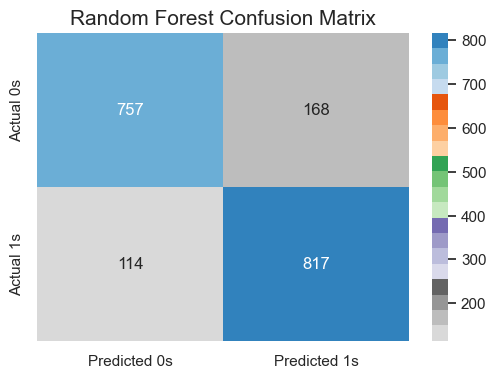

In [53]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("Random Forest Confusion Matrix", fontsize=15)
sns.heatmap(cm5, annot=True, cmap='tab20c_r', fmt='g',
            xticklabels = ('Predicted 0s','Predicted 1s'), 
            yticklabels = ('Actual 0s','Actual 1s'));

### Model Improvement using GridSearchCV

In [54]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250]
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
   
# fitting the model for grid search 
grid_search.fit(x_train_scaled, y_train)
 
# print best parameter after tuning 
print(f"Best Parameters : {grid_search.best_params_}")
print(f"Best Score      : {grid_search.best_score_}")

Best Parameters : {'n_estimators': 200}
Best Score      : 0.8362962962962962


In [55]:
y_pred5a = grid_search.predict(x_test_scaled)

akurasi5a = accuracy_score(y_test, y_pred5a)
accuracy_gscv.append(100*akurasi5a)
print(f"Akurasi Model: {akurasi5a}", "\n")

report = classification_report(y_test, y_pred5a)
print(report)

Akurasi Model: 0.8485991379310345 

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       925
           1       0.83      0.87      0.85       931

    accuracy                           0.85      1856
   macro avg       0.85      0.85      0.85      1856
weighted avg       0.85      0.85      0.85      1856



**Kesimpulan**

Berdasarkan hasil perhitungan akurasi diatas, maka dapat disimpulkan bahwa pada model Random Forest, hyperparameter tuning menggunakan GridSearchCV berpengaruh untuk menaikkan akurasi sehingga nilai akurasi bertambah dari 84.81% ke 84.86%.

## Naive Bayes

In [56]:
nb = GaussianNB()
nb.fit(x_train_scaled, y_train)

y_pred6 = nb.predict(x_test_scaled)

akurasi6 = accuracy_score(y_test, y_pred6)
accuracy_list.append(100*akurasi6)

print("Akurasi Model :", akurasi6)

Akurasi Model : 0.7257543103448276


### Classification Report

In [57]:
report = classification_report(y_test, y_pred6)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.60      0.69       925
           1       0.68      0.85      0.76       931

    accuracy                           0.73      1856
   macro avg       0.74      0.73      0.72      1856
weighted avg       0.74      0.73      0.72      1856



### Confusion Matrix

In [58]:
cm6 = confusion_matrix(y_test, y_pred6)

print("Confusion Matrix :", "\n", cm6)

Confusion Matrix : 
 [[557 368]
 [141 790]]


Visualisasi confusion matrix menggunakan heatmap

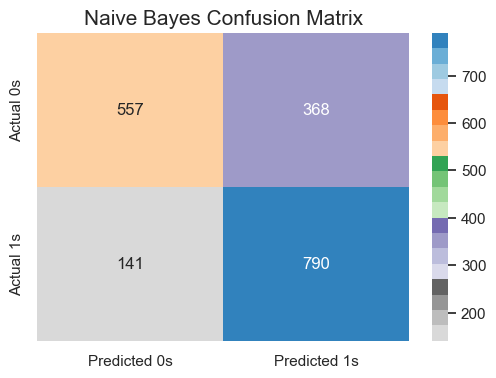

In [59]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("Naive Bayes Confusion Matrix", fontsize=15)
sns.heatmap(cm6, annot=True, cmap='tab20c_r', fmt='g',
            xticklabels = ('Predicted 0s','Predicted 1s'), 
            yticklabels = ('Actual 0s','Actual 1s'));

### Model Improvement using GridSearchCV

In [60]:
n_features, n_classes = x_train_scaled.shape[1], np.unique(y_train)
n_features, n_classes

(12, array([0, 1]))

In [61]:
params = {
            'priors': [None, [0.1,]* len(n_classes),],
            'var_smoothing': [1e-9, 1e-6, 1e-12],
         }

grid_search = GridSearchCV(nb, params, n_jobs=-1, cv=5, verbose=5)
   
# fitting the model for grid search 
grid_search.fit(x_train_scaled, y_train)
 
# print best parameter after tuning 
print(f"Best Parameters : {grid_search.best_params_}")
print(f"Best Score      : {grid_search.best_score_}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters : {'priors': None, 'var_smoothing': 1e-09}
Best Score      : 0.7223108896693803


In [62]:
y_pred6a = grid_search.predict(x_test_scaled)

akurasi6a = accuracy_score(y_test, y_pred6a)
accuracy_gscv.append(100*akurasi6a)
print(f"Akurasi Model: {akurasi6a}", "\n")

report = classification_report(y_test, y_pred6a)
print(report)

Akurasi Model: 0.7257543103448276 

              precision    recall  f1-score   support

           0       0.80      0.60      0.69       925
           1       0.68      0.85      0.76       931

    accuracy                           0.73      1856
   macro avg       0.74      0.73      0.72      1856
weighted avg       0.74      0.73      0.72      1856



**Kesimpulan** 

Berdasarkan hasil perhitungan akurasi diatas, maka dapat disimpulkan bahwa pada model Naive Bayes, hyperparameter tuning menggunakan GridSearchCV tidak berpengaruh untuk menaikkan akurasi sehingga nilai akurasi tidak berubah yaitu 72.58%.

# Kesimpulan
## Perbandingan Hasil Akurasi Setiap Model

In [63]:
accuracy_list

[78.39439655172413,
 74.83836206896551,
 80.98060344827587,
 79.14870689655173,
 84.80603448275862,
 72.57543103448276]

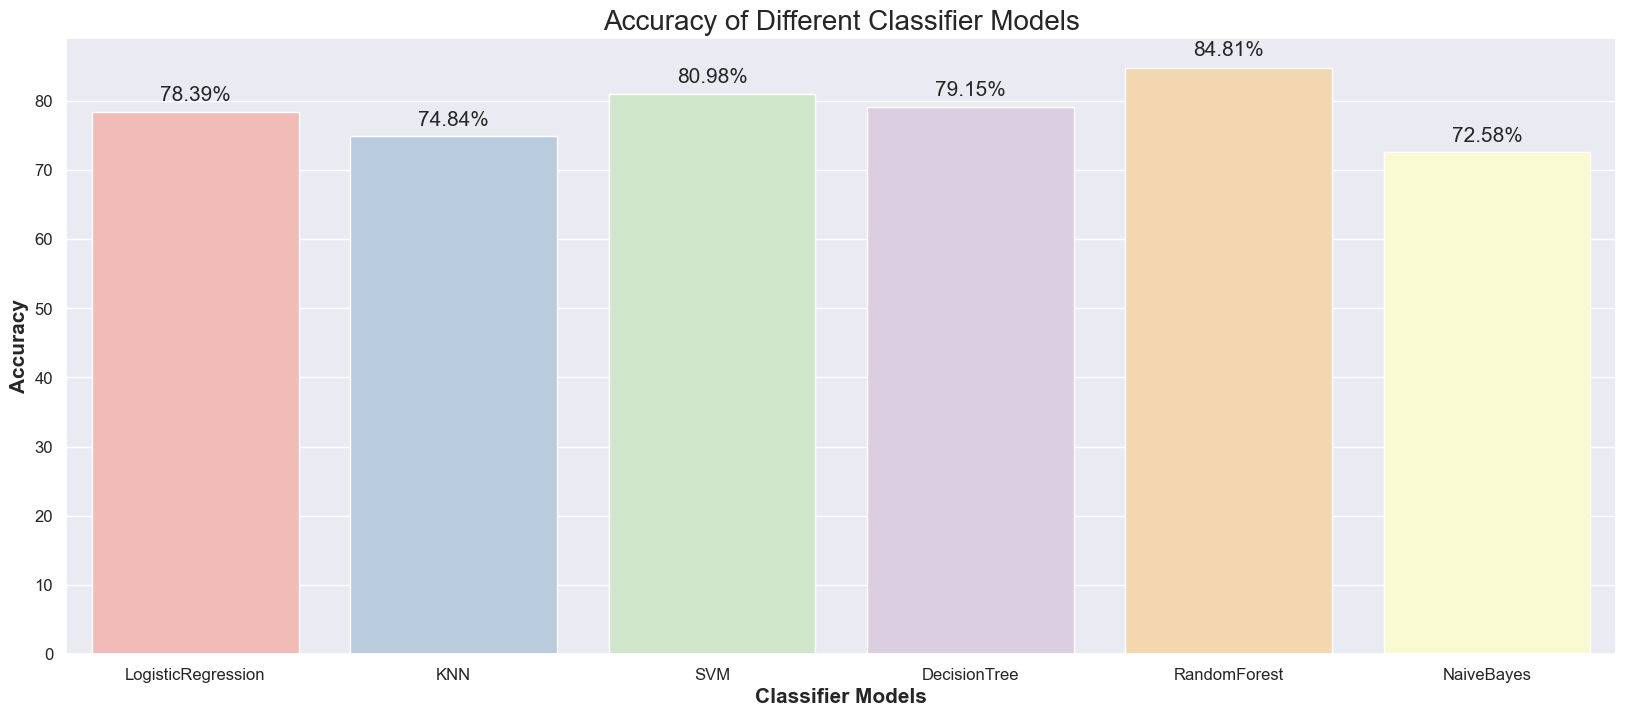

In [64]:
model_list = ['LogisticRegression', 'KNN', 'SVM', 'DecisionTree', 'RandomForest', 'NaiveBayes']

plt.rcParams['figure.figsize'] = 20, 8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "Pastel1")
plt.xlabel('Classifier Models', fontsize = 15, fontweight = 'bold')
plt.ylabel('Accuracy', fontsize = 15, fontweight = 'bold')
plt.title('Accuracy of Different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center')
plt.yticks(fontsize = 12)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 15)
    
plt.show()

## Perbandingan Hasil Akurasi setelah Model Improvement

In [65]:
accuracy_gscv

[78.39439655172413,
 75.86206896551724,
 78.82543103448276,
 76.5625,
 84.85991379310344,
 72.57543103448276]

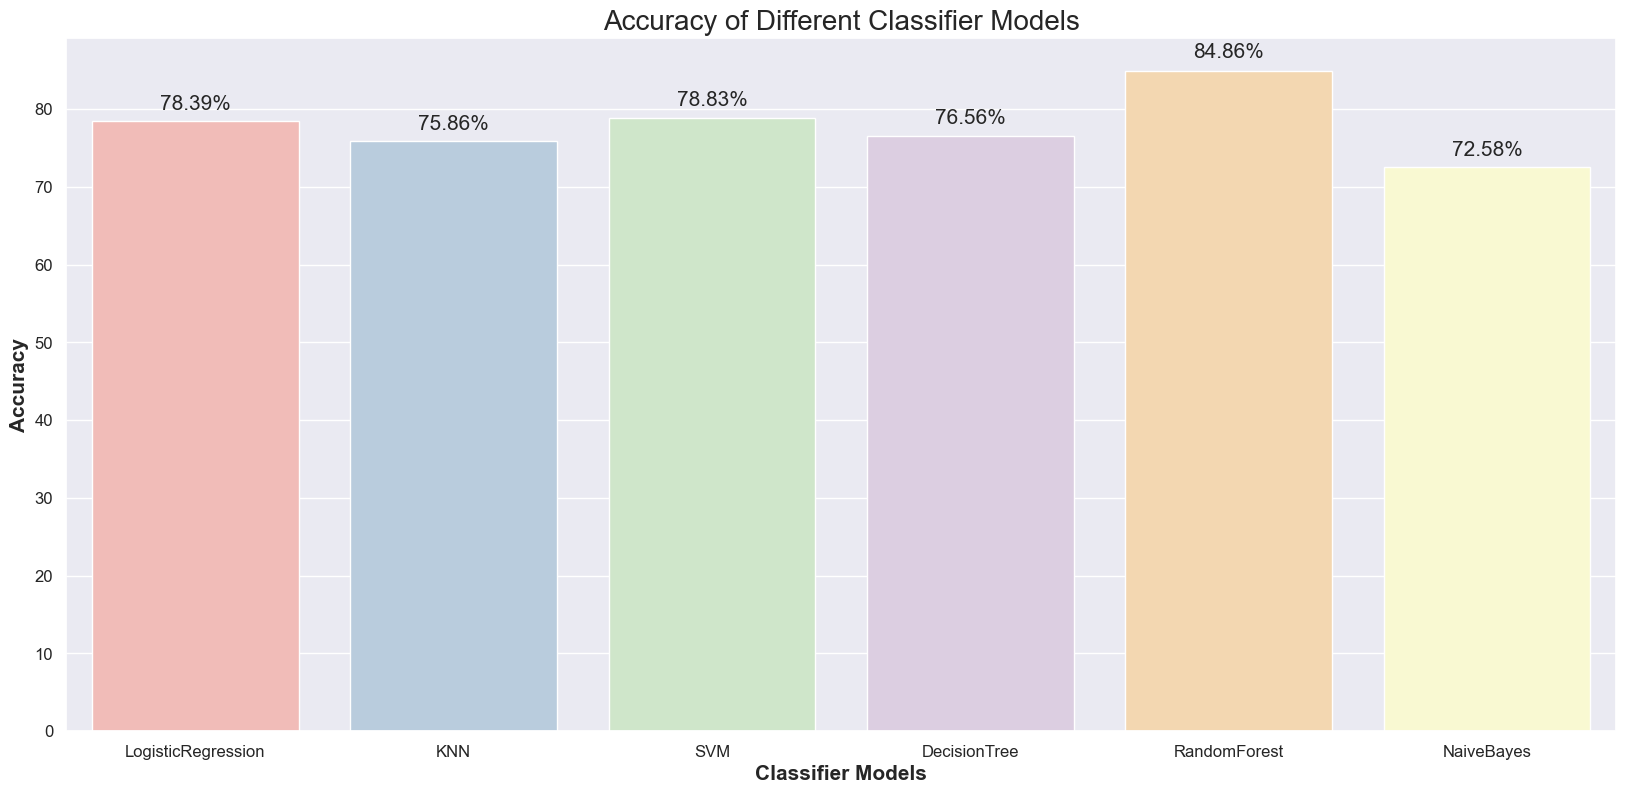

In [66]:
model_list = ['LogisticRegression', 'KNN', 'SVM', 'DecisionTree', 'RandomForest', 'NaiveBayes']

plt.rcParams['figure.figsize'] = 20, 9
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_gscv, palette = "Pastel1")
plt.xlabel('Classifier Models', fontsize = 15, fontweight = 'bold')
plt.ylabel('Accuracy', fontsize = 15, fontweight = 'bold')
plt.title('Accuracy of Different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center')
plt.yticks(fontsize = 12)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 15)
    
plt.show()

Berdasarkan pemodelan dan visualisasi yang telah dilakukan, dapat disimpulkan bahwa:
- Model terbaik yang didapatkan berdasarkan nilai akurasi tertinggi yaitu Random Forest dengan akurasi 84.81% dan saat model improvement dengan GridSearchCV nilai akurasi naik menjadi 84.86%
- Model dengan akurasi terkecil yaitu Naive Bayes dengan akurasi 72.8% dan saat dilakukan model improvement menggunakan GridSearchCV, nilai akurasi tidak berubah
- GridSearchCV dapat digunakan untuk memperbaiki performa model machine learning, tetapi tergantung dengan model yang digunakan. Seperti dalam project ini, penggunaan GridSearchCV pada model Logistic Regression dan Naive Bayes tidak berpengaruh pada akurasi. Pada model KNN dan Random Forest, penggunaan GridSearchCV dapat meningkatkan akurasi, sedangkan pada model SVM dan Decision Tree justru menurunkan nilai akurasi.

---